<a href="https://colab.research.google.com/github/Pratik25priyanshu20/sas-viya-quick-start/blob/main/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303302 entries, 0 to 303301
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             303302 non-null  object 
 1   title          303301 non-null  object 
 2   type           303301 non-null  object 
 3   genres         258352 non-null  object 
 4   averageRating  191702 non-null  float64
 5   numVotes       191702 non-null  float64
 6   releaseYear    298305 non-null  float64
dtypes: float64(3), object(4)
memory usage: 16.2+ MB
None

Summary Statistics:
       averageRating      numVotes    releaseYear
count  191702.000000  1.917020e+05  298305.000000
mean        6.194487  3.869941e+03    1976.301986
std         1.279412  4.007383e+04      27.444256
min         1.000000  5.000000e+00    1894.000000
25%         5.400000  2.100000e+01    1958.000000
50%         6.300000  6.600000e+01    1982.000000
75%         7.100000  3.110000e+02    

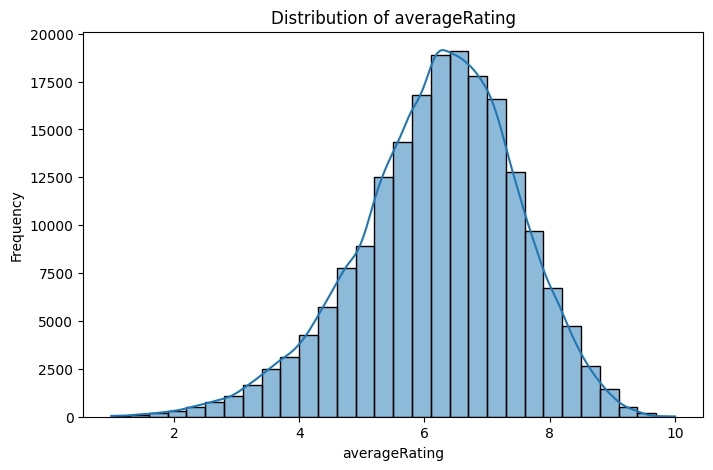

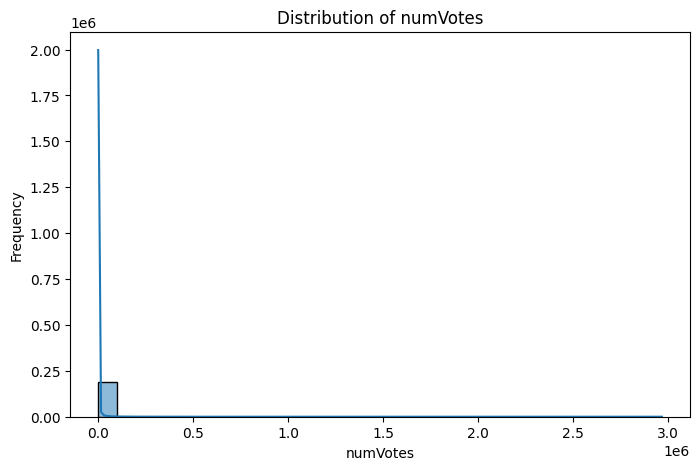

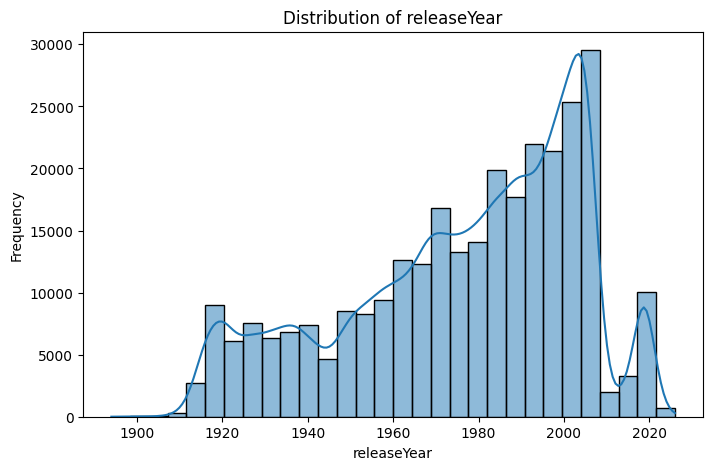

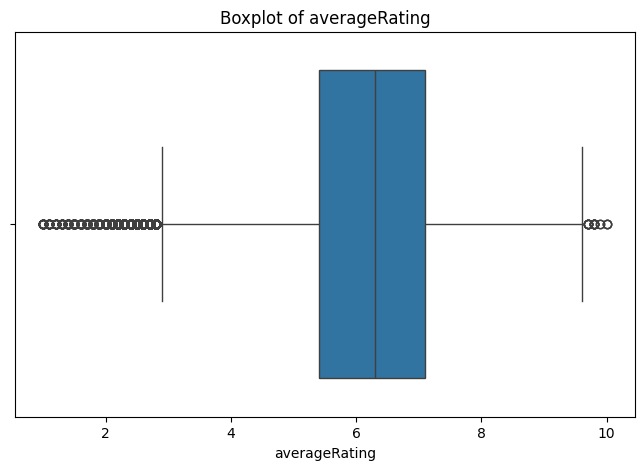

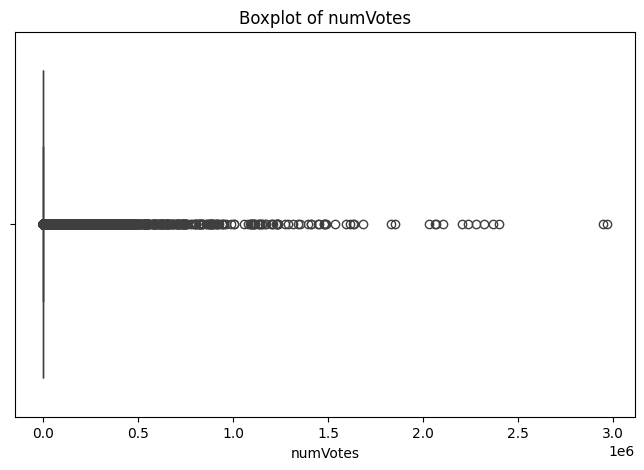

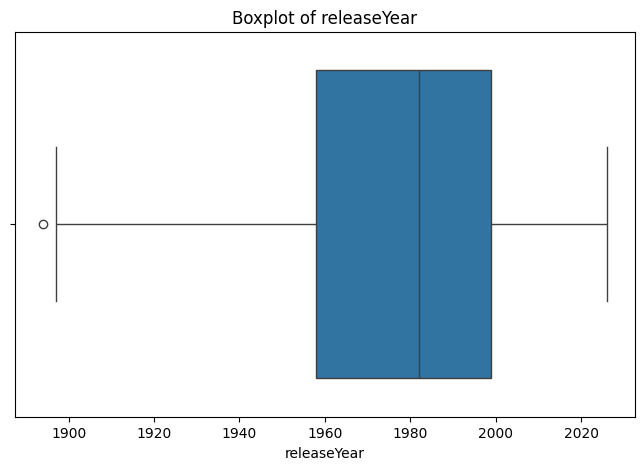

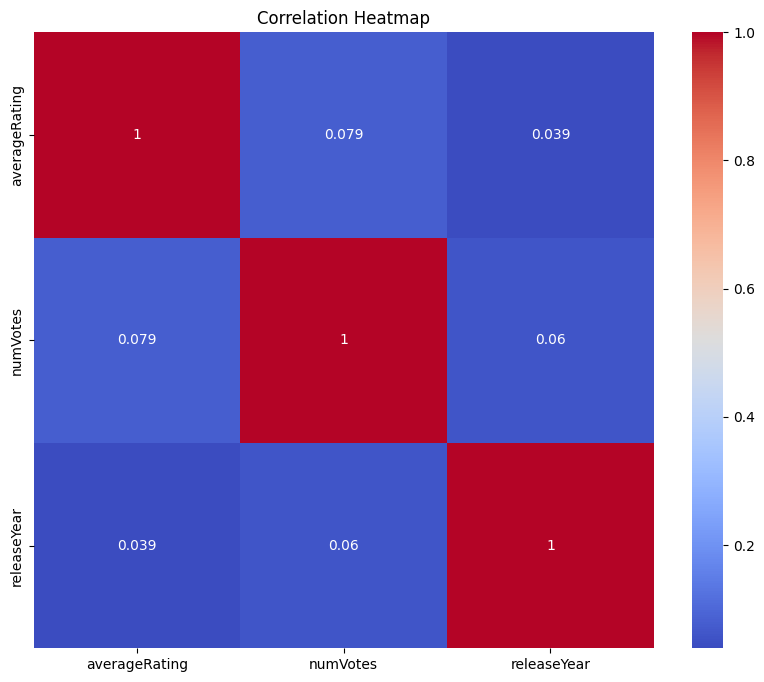

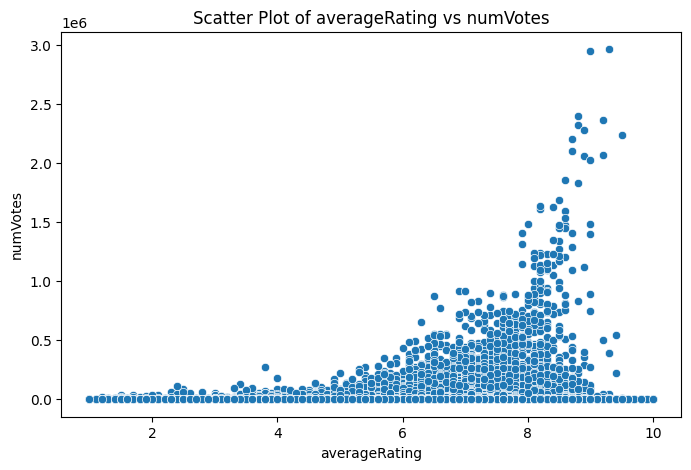

In [ ]:
#Exercise_1_analysis_of_movies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = r"/content/data[1].csv"
data = pd.read_csv(file_path)
print("Dataset Overview:")
print(data.info())  #
print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


numerical_cols = data.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    print(f"\n--- {col} ---")
    print(f"Mean: {data[col].mean()}")
    print(f"Median: {data[col].median()}")
    print(f"Mode: {data[col].mode().iloc[0]}")
    print(f"Variance: {data[col].var()}")
    print(f"Standard Deviation: {data[col].std()}")
    print(f"IQR: {data[col].quantile(0.75) - data[col].quantile(0.25)}")


for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

if len(numerical_cols) > 1:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=numerical_cols[0], y=numerical_cols[1], data=data)
    plt.title(f"Scatter Plot of {numerical_cols[0]} vs {numerical_cols[1]}")
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])
    plt.show()


categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


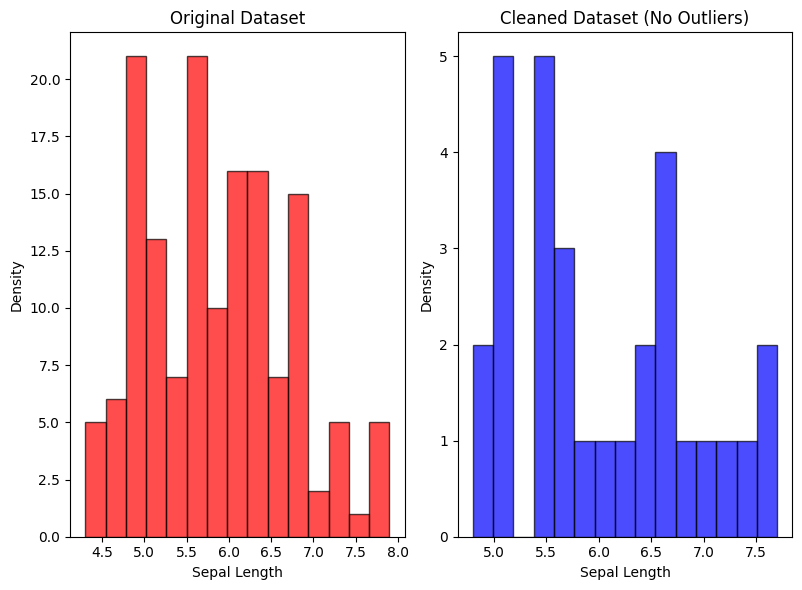

In [ ]:
#EXERCISE_2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = sns.load_dataset("iris")


print(data.describe())
print(data.head())


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_data


cleaned_data = remove_outliers(data, 'sepal_length')


def systematic_sampling(data, fraction):
    step = int(1 / fraction)
    sampled_data = data.iloc[::step]
    return sampled_data



systematic_sample = systematic_sampling(cleaned_data, 0.2)



plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 1)
plt.hist(data['sepal_length'], bins=15, color='red', edgecolor='black', alpha=0.7, )
plt.title("Original Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Density")



plt.subplot(1, 3, 2)
plt.hist(systematic_sample['sepal_length'], bins=15, color='blue', edgecolor='black', alpha=0.7, )
plt.title("Cleaned Dataset (No Outliers)")
plt.xlabel("Sepal Length")
plt.ylabel("Density")



plt.tight_layout()
plt.show()


In [ ]:
#EXERCISE_3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, f_oneway, norm,pearsonr,ttest_ind
from sklearn.datasets import load_iris



#iris= sns.load_dataset("iris")
iris = load_iris()

#versicolor_data = iris[iris['species'] == 'versicolor']['sepal_length']

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species']= [iris.target_names[i] for i in iris.target]

iris_df.columns =['sepal_length','sepal_width','petal_length','petal_width','species']

versicolor_petal_length  = iris_df[iris_df['species']=='versicolor']['petal_length']
virginica_petal_length = iris_df[iris_df['species']=='virginica']['petal_length']

t_stat, p_value = ttest_1samp(versicolor_petal_length, virginica_petal_length.mean())
#why not ttest_ind?
print(f"T-statistics: {t_stat}")
print(f"P-Value: {p_value}")





if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in petal length between versicolor and virginica.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in petal length between versicolor and virginica.")

    sample_mean = np.mean(versicolor_petal_length)
    std_dev = 0.35
    n= len(versicolor_petal_length)

    confidence_level = 0.95
    #z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)
    margin_of_error = 1.96 * (std_dev / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {std_dev:.3f}")





    setosa_petal_width= iris_df[iris_df['species']=='setosa']['petal_width']
    versicolor_petal_width=iris_df[iris_df['species']=='versicolor']['petal_width']
    virginica_petal_width=iris_df[iris_df['species']=='virginica']['petal_width']

    f_stat, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

    print(f"F-statistics: {f_stat}")
    print(f"P-Value: {p_value}")

    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in petal width between the three species.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in petal width between the three species.")




sepal_length = iris_df['sepal_length']
petal_length = iris_df['petal_length']


corr_coeff, corr_p_value = pearsonr(iris_df['sepal_length'],iris_df['petal_length'])

print(f"Correlation Coefficient: {corr_coeff}")
print(f"P-Value: {corr_p_value}")

#corr=iris.iloc[:,:-1].corr()
#sns.heatmap(corr,annot=True,cmap="coolwarm")
#plt.title("correlation heatmap")

#plt.show()




T-statistics: -19.441596505341977
P-Value: 1.1089855795912826e-24
Reject the null hypothesis: There is a significant difference in petal length between versicolor and virginica.
Correlation Coefficient: 0.8717537758865831
P-Value: 1.0386674194498827e-47
